Importa o modelo a ser fatiado e mapeado

In [ ]:
import matplotlib.pyplot as plt
from components import gui
from components import files
from components.timer import Timer
from components.layer import Layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
choice = gui.ask_load_or_begin()
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        Layer.create_layers(folders, path_input, file_name, dpi, layer_height)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
criando as camadas
First arg: /home/matheus/TangranV2/input/stl_models/Lingote9025.stl
Second arg: 300.0
Script executed from: /home/matheus/TangranV2
Script executed from: /home/matheus/TangranV2/input/sliced
Script executed from: /home/matheus/TangranV2
Script executed from: /home/matheus/TangranV2/slicing-with-images
number of degenerated triangles = 0
eps = 0.004
max thickness = 2
rounded plane spacing spacing = 2
model zmin = -7.752, model zmax = 15, first plane Z = -9.748, number of planes = 14
-Incremental, Lingote9025.stl, thickness = 2, #T = 432, #P = 12, #S = 384, 0.000128s (slicing), 0.000635s (polygon assembling), 0.00536s (total), *K: 0.888889


/bin/bash: /home/matheus/anaconda3/lib/python3.11/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
rm: cannot remove '*.svg': No such file or directory
rm: cannot remove '*.png': No such file or directory




writing image: ../input/sliced/layer_000.pgm


writing image: ../input/sliced/layer_001.pgm


writing image: ../input/sliced/layer_002.pgm


writing image: ../input/sliced/layer_003.pgm


writing image: ../input/sliced/layer_004.pgm


writing image: ../input/sliced/layer_005.pgm


writing image: ../input/sliced/layer_006.pgm


writing image: ../input/sliced/layer_007.pgm


writing image: ../input/sliced/layer_008.pgm


writing image: ../input/sliced/layer_009.pgm


writing image: ../input/sliced/layer_010.pgm


writing image: ../input/sliced/layer_011.pgm


writing output file: out_3d.svg
... done


Total de [criando as camadas] : 0.7501320838928223
salvando as camadas
Total de [salvando as camadas] : 0.32897377014160156
Total de [Fase 0: ] : 1.0796253681182861


Paredes Finas

In [ ]:
from components import gui
from components import files
from components.timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
#[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
configuracoes = files.Config("solda_config.yaml")
[d_tw, sob_tw_per, name_prog] = gui.ask_parameters_thin_walls(configuracoes)
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        #c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        c.make_thin_walls(folders, d_tw, sob_tw_per, name_prog)
        %reset_selective -f "c"
%reset_selective -f "camadas"
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Fase 1: Camada: 0
Criando paredes finas
Total de [Criando paredes finas] : 1.044858455657959
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0002434253692626953
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.019047975540161133
Total de [Fase 1: Camada: 0] : 1.0981872081756592
Fase 1: Camada: 1
Criando paredes finas
Total de [Criando paredes finas] : 1.0656712055206299
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0004706382751464844
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.01656174659729004
Total de [Fase 1: Camada: 1] : 1.1126105785369873
Fase 1: Camada: 2
Criando paredes finas
Total de [Criando paredes finas] : 0.9540560245513916
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0007760524749755859
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.020816802978515625
Total de [Fase 1: Camada: 2] : 1.01

Contornos

In [ ]:
from components import gui
from components import files
from components.timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
configuracoes = files.Config("solda_config.yaml")
[void_max,external_max,internal_max,d_cont,sob_cont_per,name_prog] = gui.ask_parameters_offsets(configuracoes)
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max, d_cont, sob_cont_per, name_prog)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        # %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 2
Total de [Criando Lvls] : 0.44871973991394043
Criando os loops
Total de [Criando os loops] : 0.06590127944946289
Criando regiões de influência
Total de [Criando regiões de influência] : 0.0075435638427734375
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 0.02061176300048828
Retirando regiões da camada
['Lvl_000', 0, 0] Perdendo total:2775 maior void:0.30318916557448666Bw -> aceito
['Lvl_001', 0, 0] Perdendo total:724 maior void:0.07907383136740935Bw -> aceito
Total de [Retirando regiões da camada] : 0.03540515899658203
Reunindo todos os loops em uma unica imagem
Total de [Reunindo todos os loops em uma unica imagem] : 0.007298469543457031
salvando imagens das regiões
deletado: /L_000/I_000/offsets
Total de [salvando imagens das regiões] : 0.052042245864868164
Total de [Fase 2: Camada: 0] : 0.6629314422607422
Fase 2: Camada: 1
Criando Lvls
Ilha: I_000 Número de Níveis: 2
Total de [Criando Lvls] : 0.69

Pontes

In [ ]:
from components import gui
from components import filess
from components.timer import Timer
from components import layer
from os import getcwd
import numpy as np
from components import images_tools as it

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
configuracoes = files.Config("solda_config.yaml")
[n_max, d_bridg, sob_bridg_per, name_prog] = gui.ask_parameters_bridges(configuracoes)
camadas = folders.load_layers_hdf5()
last_prohibited_areas = np.zeros(camadas[0].base_frame)
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        if i%2 == 1:
            last_image = it.rotate_img_cw(last_prohibited_areas )
        elif i%2 == 0:
            last_image = it.rotate_img_ccw(last_prohibited_areas )
        if i >= 2:
            if i%2 == 1:
                second_last_image = it.rotate_img_cw(camadas[i - 1].prohibited_areas)
            elif i%2 == 0:
                second_last_image = it.rotate_img_ccw(camadas[i - 1].prohibited_areas)
        else:
            second_last_image = np.zeros_like(last_image)
        c.prohibited_areas = last_image
        sum_prohibited_areas = it.sum_imgs([last_image, second_last_image])
        last_prohibited_areas = c.make_bridges(folders, n_max, d_bridg, sob_bridg_per, len(camadas), sum_prohibited_areas, name_prog)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
%reset_selective -f "camadas"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.05371904373168945
Criando pontes de Zigzag
teste: caso de uma unica linha no entorno da origem
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 1.8089752197265625
Criando pontes de Crossover
Total de [Criando pontes de Crossover] : 0.004100799560546875
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.010369300842285156
Gerando áreas proibidas
Total de [Gerando áreas proibidas] : 1.71661376953125e-05
salvando imagens das regiões
deletado: /L_000/I_000/bridges
Total de [salvando imagens das regiões] : 0.06632614135742188
Total de [Fase 3: Camada: 0] : 1.9860897064208984
Fase 3: Camada: 1
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.042494773864746094
Criando pontes de Zigzag
teste: caso de uma unica linha no entorno da origem
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 2.250823497772217
Criando pontes de Crossover
Total de [Criando pontes de Cr

Zigzags

In [ ]:
from components import gui
from components import files
from components.timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
configuracoes = files.Config("solda_config.yaml")
[d_larg, sob_larg_per, name_prog] = gui.ask_parameters_zigzags(configuracoes)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders, d_larg, sob_larg_per, name_prog)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 1.139878511428833
salvando imagens das regiões
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das regiões] : 0.012670516967773438
Total de [Fase 4: Camada: 0] : 1.1937463283538818
Fase 4: Camada: 1
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 1.7597596645355225
salvando imagens das regiões
deletado: /L_001/I_000/zigzags
Total de [salvando imagens das regiões] : 0.013037443161010742
Total de [Fase 4: Camada: 1] : 1.820706844329834
Fase 4: Camada: 2
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 1.164750576019287
salvando imagens das regiões
deletado: /L_002/I_000/zigzags
Total de [salvando imagens das regiões] : 0.011622190475463867
Total de [Fase 4: Camada: 2] : 1.2203123569488525
Fase 4: Camada: 3
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 1.956904411315918
salvando imagens das regiões
deletado: /L_003

IMAGEM DO MAPEAMENTO

Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 0.10043215751647949
Fase 4: Camada: 1


Total de [Fase 4: Camada: 1] : 0.1271669864654541
Fase 4: Camada: 2


Total de [Fase 4: Camada: 2] : 0.26044607162475586
Fase 4: Camada: 3


Total de [Fase 4: Camada: 3] : 0.13790678977966309
Fase 4: Camada: 4


Total de [Fase 4: Camada: 4] : 0.13998103141784668
Fase 4: Camada: 5


Total de [Fase 4: Camada: 5] : 0.1233677864074707
Fase 4: Camada: 6


Total de [Fase 4: Camada: 6] : 0.13822650909423828
Fase 4: Camada: 7


Total de [Fase 4: Camada: 7] : 0.13494300842285156


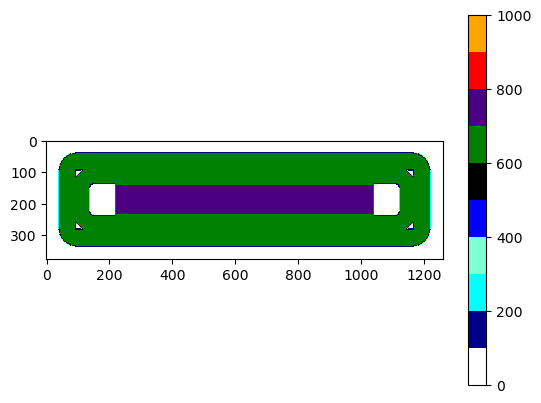

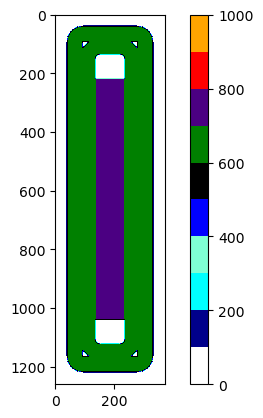

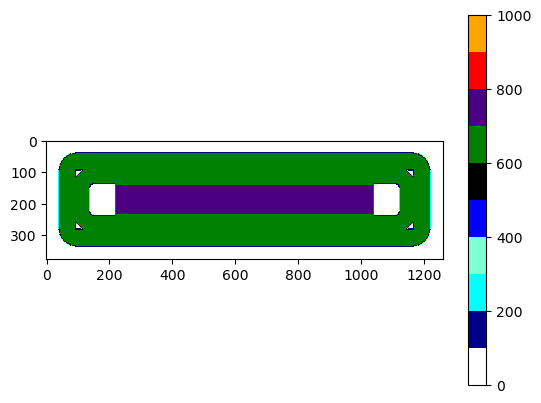

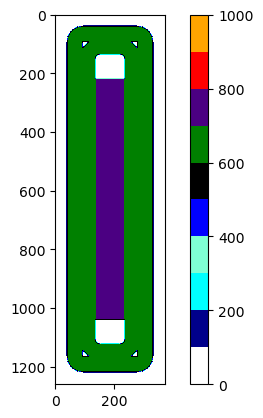

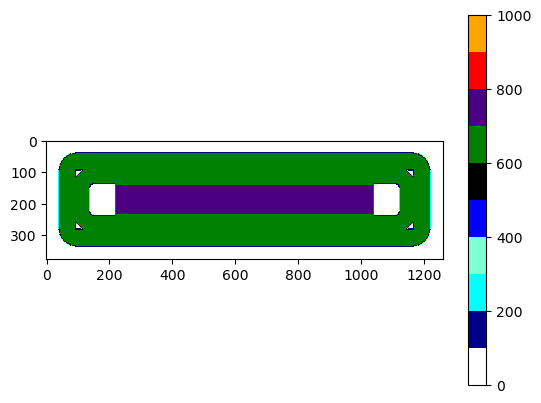

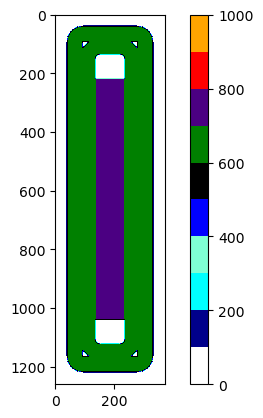

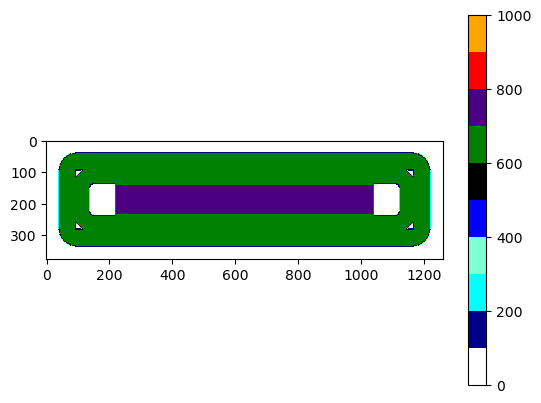

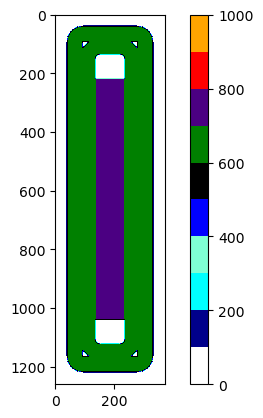

In [ ]:
from components import gui
from components import files
from components.timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.imsave("aaa.png",img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

ROTAS

Rotas de Offset

In [ ]:
from components import gui
from components import files
from components.timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.014314651489257812
Total de [Making offset routes] : 0.4139060974121094
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.01543569564819336
Total de [Making offset routes] : 0.43637681007385254
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.015462636947631836
Total de [Making offset routes] : 0.3984856605529785
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.014017581939697266
Total de [Making offset routes] : 0.4430429935455322
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.012154579162597656
Total de [Making offset routes] : 0.3813159465789795
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.014157772064208984
Total de [Making offset routes] : 0.46616506576538086
Making offset routes
salvan

Rotas de pontes

In [ ]:
from components import gui
from components import files
from components.timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[sob_int_ext_per] = gui.ask_parameters_internal_routes()

with Timer(f"Making bridges routes"):
    for c in camadas:
        with Timer(f"Camada: {c.name}"):
            c.make_bridges_routes(folders, sob_int_ext_per)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Making bridges routes
Camada: L_000
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.00017571449279785156
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 1.190537929534912
Making Crossover bridges routes
Total de [Making Crossover bridges routes] : 0.0002002716064453125
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.023969650268554688
Total de [Camada: L_000] : 1.3851540088653564
Camada: L_001
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.00012564659118652344
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 1.194817304611206
Making Crossover bridges routes
Total de [Making Crossover bridges routes] : 0.00021576881408691406
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.02589869499206543
Total de [Camada: L_001] : 1.3228628635406494
Camada: L_002
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.00012755393981933594
Making Zig

Rotas de Ziguezague

In [ ]:
from components import gui
from components import files
from components.timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"



Making zigzag routes
criando as rotas de zigzag, camada:L_000
Total de [criando as rotas de zigzag, camada:L_000] : 0.024819374084472656
salvando imagens das rotas
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das rotas] : 0.0042552947998046875
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.0015957355499267578
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.0009648799896240234
salvando grafos
Total de [salvando grafos] : 0.04132962226867676
Total de [Making zigzag routes] : 0.11798095703125
Making zigzag routes
criando as rotas de zigzag, camada:L_001
Total de [criando as rotas de zigzag, camada:L_001] : 0.018542051315307617
salvando imagens das rotas
deletado: /L_001/I_000/zigzags
Total de [salvando imagens das rotas] : 0.0034346580505371094
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.0010478496551513672
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.000950574874877929

WEAVING

In [ ]:
from components import gui
from components import files
from components.timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[iwflag] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(iwflag, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.5237035751342773
salvando rotas
deletado: /L_000/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.03992962837219238
Total de [Fase 5 b] : 0.5640859603881836
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.4889414310455322
salvando rotas
deletado: /L_001/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.03762412071228027
Total de [Fase 5 b] : 0.5269253253936768
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.4914066791534424
salvando rotas
deletado: /L_002/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.03813624382019043
Total de [Fase 5 b] : 0.5298399925231934
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.48813343048095703
salvando rotas
deletado: /L_003/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.03874468803405762


Rotas de Thin Walls

In [ ]:
from components import gui
from components import files
from components.timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.0171968936920166
salvando imagens das rotas
Total de [salvando imagens das rotas] : 5.7220458984375e-06
Total de [Making thin walls routes] : 0.017429351806640625
Total de [Fase 5] : 0.017547130584716797
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.013063192367553711
salvando imagens das rotas
Total de [salvando imagens das rotas] : 5.4836273193359375e-06
Total de [Making thin walls routes] : 0.01331186294555664
Total de [Fase 5] : 0.013327598571777344
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.01642584800720215
salvando imagens das rotas
Total de [salvando imagens das rotas] : 5.7220458984375e-06
Total de [Making thin walls routes] : 0.01665782928466797
Total de [Fase 5] : 0.016672372817993164
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.015020132064819336
salvando imagens das rotas
Total de [salv

Encontrando o lugar onde será o começo da trilha de cada ilha

In [ ]:
from components import gui
from components import files
from components.timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.islands_path_starts(folders)

%reset_selective -f "camadas"                        

Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0016326904296875
Total de [Encontrando ponto de união ext-int] : 0.13067197799682617
Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0014197826385498047
Total de [Encontrando ponto de união ext-int] : 0.17977428436279297
Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.001298666000366211
Total de [Encontrando ponto de união ext-int] : 0.12763547897338867
Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.001409292221069336
Total de [Encontrando ponto de união ext-int] : 0.18128061294555664
Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0013706684112548828
Total de [Enc

Unificando rotas EXTERNAS nas camadas

In [ ]:
from components import gui
from components import files
from components.timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer(f"Fase 6: layer_{c.name}"):
        c.close_routes_external(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"
    

Fase 6: layer_L_000
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.03561711311340332
Conectando pontes de Crossover
Total de [Conectando pontes de Crossover] : 0.021985530853271484
Total de [Conectando rotas externas] : 0.13652944564819336
salvando imagens das rotas
deletado: /L_000/I_000/external_tree_route
Total de [salvando imagens das rotas] : 0.05151867866516113
Total de [Fase 6: layer_L_000] : 0.18842101097106934
Fase 6: layer_L_001
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.021357297897338867
Conectando pontes de Crossover
Total de [Conectando pontes de Crossover] : 0.02460002899169922
Total de [Conectando rotas externas] : 0.12157940864562988
salvando imagens das rotas
deletado: /L_001/I_000/external_tree_route
Total de [salvando imagens das rotas] : 0.050325870513916016
Total de [Fase 6: layer_L_001] : 0.17215633392333984
Fase 6: layer_L_002
Conectando rotas externas
Conecta

Unificando rotas INTERNAS nas camadas

In [ ]:
from components import gui
from components import files
from components.timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer(f"Fase 7: Layer_{c.name}"):
        c.close_routes_internal(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 7: Layer_L_000
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.22896289825439453
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0015633106231689453
salvando imagens das rotas
deletado: /L_000/I_000/internal_tree_route
Total de [salvando imagens das rotas] : 0.04702877998352051
Total de [Fase 7: Layer_L_000] : 0.3653755187988281
Fase 7: Layer_L_001
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.31697630882263184
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0006840229034423828
salvando imagens das rotas
deletado: /L_001/I_000/internal_tree_route
Total de [salvando imagens das rotas] : 0.04492068290710449
Total de [Fase 7: Layer_L_001] : 0.436068058013916
Fase 7: Layer_L_002
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.2015364170074463
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0007529258728027344
salvando imagens das rotas
deletado: /L_002/

Unindo rotas de thin walls

In [ ]:
from components import gui
from components import files
from components.timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer(f"Fase 8: Layer_{c.name}"):
        c.close_routes_thinwalls(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 8: Layer_L_000
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0003695487976074219
salvando imagens das rotas
deletado: /L_000/I_000/thinwalls_tree_route/sequence
deletado: /L_000/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.04223895072937012
Total de [Fase 8: Layer_L_000] : 0.062189340591430664
Fase 8: Layer_L_001
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0005514621734619141
salvando imagens das rotas
deletado: /L_001/I_000/thinwalls_tree_route/sequence
deletado: /L_001/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.04016542434692383
Total de [Fase 8: Layer_L_001] : 0.0559391975402832
Fase 8: Layer_L_002
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.00037932395935058594
salvando imagens das rotas
deletado: /L_002/I_000/thinwalls_tree_route/sequence
deletado: /L_002/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.04000973701477051

Unindo todas as rotas

In [ ]:
from components import gui
from components import files
from components.timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.close_final_path(folders)

%reset_selective -f "camadas"


Encontrando ponto de união ext-int
Total de [Encontrando ponto de união ext-int] : 0.13194704055786133
Conectando todas as partes
Total de [Conectando todas as partes] : 1.4474282264709473
salvando imagens das rotas
deletado: /L_000/I_000/island_route
[[110, 223], [110, 1107], [111, 1108], [111, 1116], [112, 1117], [112, 1119], [113, 1120], [113, 1122], [114, 1123], [114, 1125], [115, 1126], [115, 1127], [117, 1129], [117, 1130], [119, 1132], [119, 1133], [127, 1141], [128, 1141], [130, 1143], [131, 1143], [133, 1145], [134, 1145], [135, 1146], [137, 1146], [138, 1147], [140, 1147], [141, 1148], [143, 1148], [144, 1149], [152, 1149], [153, 1150], [221, 1150], [222, 1149], [230, 1149], [231, 1148], [233, 1148], [234, 1147], [236, 1147], [237, 1146], [239, 1146], [240, 1145], [241, 1145], [243, 1143], [244, 1143], [246, 1141], [247, 1141], [255, 1133], [255, 1132], [257, 1130], [257, 1129], [259, 1127], [259, 1126], [260, 1125], [260, 1123], [261, 1122], [261, 1120], [262, 1119], [262, 1

Gerando o Código G

In [ ]:
from components import gui
from components import files
from components.timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[vel_vazio, p_entre_int_ext, p_entre_camadas, substratoy, substratox, cortey, cortex] = gui.ask_parameters_Gcode()
coords_substrato = [substratoy, substratox]
coords_corte = [cortey, cortex]
camadas = folders.load_layers_hdf5()
configuracoes = files.Config("solda_config.yaml")

#layer_heights = [10+2.9+3+(i*1.5) for i,x in enumerate(camadas)]
layer_heights = [0+6+2.5+(i*2) for i,x in enumerate(camadas)]
with Timer("Cuspindo o Gcode"):
    path_tools.layers_to_Gcode(camadas, 
                               folders, 
                               configuracoes,
                               vel_vazio,
                               p_entre_int_ext,
                               p_entre_camadas,
                               layer_heights,
                               coords_substrato,
                               coords_corte,
                               )
%reset_selective -f "camadas"

Cuspindo o Gcode
trocou para 1
trocou para 2
Deslocamento total da camada 0 = 666.2831388246092mm
Tempo estimado com Vel=360.0mm/min = 1.8507864967350256min

trocou para 1
trocou para 2
Deslocamento total da camada 1 = 658.1195195905234mm
Tempo estimado com Vel=360.0mm/min = 1.8281097766403427min

trocou para 1
trocou para 2
Deslocamento total da camada 2 = 666.2831388246092mm
Tempo estimado com Vel=360.0mm/min = 1.8507864967350256min

trocou para 1
trocou para 2
Deslocamento total da camada 3 = 727.8154330925606mm
Tempo estimado com Vel=360.0mm/min = 2.021709536368224min

trocou para 1
trocou para 2
Deslocamento total da camada 4 = 666.2831388246092mm
Tempo estimado com Vel=360.0mm/min = 1.8507864967350256min

trocou para 1
trocou para 2
Deslocamento total da camada 5 = 727.8154330925606mm
Tempo estimado com Vel=360.0mm/min = 2.021709536368224min

trocou para 1
trocou para 2
Deslocamento total da camada 6 = 666.2831388246092mm
Tempo estimado com Vel=360.0mm/min = 1.8507864967350256min

Comprimento da trajetória

comprimento da trajetoria=107.39094342779873
Relação de velocidades:21.339477925411874
